其他形态学操作：
    
* 白顶帽变换（cv2.MORPH_TOPHAT）: 图像减去开运算，得到被消除高亮区域。

* 黑底帽变换（cv2.MORPH_BLACKHAT）：图像减去闭运算，得到被消除的暗部区域。

* 形态学梯度变换(cv2.MORPH_GRADIENT)：膨胀减去腐蚀，得到物体边界。（边缘检测）

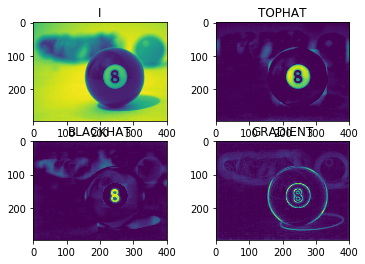

In [14]:
import cv2
import matplotlib.pyplot as plt
I = cv2.imread("open.jpg",0)
cv2.imshow("I",I)

r,i = 1,1
MAX_R,MAX_I = 20,20
cv2.namedWindow("morphology",1)
def nothing(*arg):
    pass
cv2.createTrackbar("r","morphology",r,MAX_R,nothing)
cv2.createTrackbar("i","morphology",i,MAX_I,nothing)
while True:
    r = cv2.getTrackbarPos("r","morphology")
    i = cv2.getTrackbarPos("i","morphology")
    s = cv2.getStructuringElement(cv2.MORPH_RECT,(2*r+1,2*r+1))
    d_TOPHAT = cv2.morphologyEx(I,cv2.MORPH_TOPHAT,s,iterations=i)
    d_BLACKHAT = cv2.morphologyEx(I,cv2.MORPH_BLACKHAT,s,iterations=i)
    d_GRADIENT = cv2.morphologyEx(I,cv2.MORPH_GRADIENT,s,iterations=i)
    cv2.imshow("TOPHAT",d_TOPHAT)
    cv2.imshow("BLACKHAT",d_BLACKHAT)
    cv2.imshow("GRADIENT",d_GRADIENT)
    ch = cv2.waitKey(5)
    if ch == 27:
        break
cv2.destroyAllWindows()

#r=5,i=3时，顶帽，底帽效果出的好
s = cv2.getStructuringElement(cv2.MORPH_RECT,(2*5+1,2*5+1))
d_TOPHAT = cv2.morphologyEx(I,cv2.MORPH_TOPHAT,s,iterations=3)
d_BLACKHAT = cv2.morphologyEx(I,cv2.MORPH_BLACKHAT,s,iterations=3)
#r=1,i=1时，形态学梯度使边缘出现明显
d_GRADIENT = cv2.morphologyEx(I,cv2.MORPH_GRADIENT,cv2.getStructuringElement(cv2.MORPH_RECT,(2*1+1,2*1+1)),iterations=1)
titles = ["I","TOPHAT","BLACKHAT","GRADIENT"]
images = [I,d_TOPHAT,d_BLACKHAT,d_GRADIENT]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
plt.show()

白顶帽显示暗部高亮，黑底部显示高亮暗部。形态学梯度显示边缘检测。